In [1]:
from NtupleReader import *

Welcome to JupyROOT 6.13/02


In [2]:
reader = NtupleReader('partGun_PDGid15_x1000_E300.0To300.0_NTUP_1')
reader.getDataFrame(savePickle=True)
df = reader.df

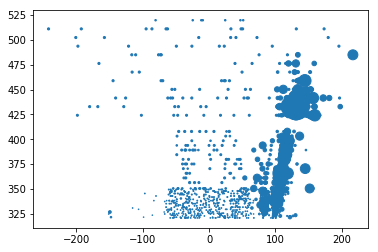

In [4]:
idx = 3
l,x,y,z,e,t = df.l[idx],df.x[idx],df.y[idx],df.z[idx],df.e[idx],df.t[idx]
plt.figure(facecolor='w')
plt.scatter(x,z,marker='o',s=100*e)